In [5]:
# generic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# notebook settings
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2 
# precision and plot settings
num_precision = 3
np.set_printoptions(precision=num_precision, suppress=True)
pd.set_option('display.float_format', lambda x: f'{x:,.{num_precision}f}')
pd.set_option("display.precision", num_precision)
pd.set_option('display.max_columns', None)

plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import random, time
import googlemaps

In [8]:
# setup dir and import helper functions
import sys, os
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'src'))
import helper_funcs as my_funcs

In [9]:
# setup API
G_MAPS_API = os.environ.get("GOOGLE_STATICMAPS_API")
gmaps = googlemaps.Client(G_MAPS_API)
n_requests = 0

In [10]:
USdata_cleaned = pd.read_csv('../data/USdata_est_campgrounds_zip_states_combined_cleaned.csv')
USdata = pd.read_csv('../data/USdata_zip_states_combined_cleaned.csv')
to_combine = [USdata_cleaned, USdata]
USdata_with_est_campgrounds = pd.concat(to_combine)
# USdata_with_est_campgrounds.to_csv('data/USdata_est_campgrounds_zip_states_combined_cleaned.csv')

In [11]:
USdata_with_est_campgrounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12412 entries, 0 to 8671
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   2241 non-null   object 
 1   Name                       12412 non-null  object 
 2   Category                   12412 non-null  object 
 3   Description                12411 non-null  object 
 4   Latitude                   12412 non-null  float64
 5   Longitude                  12412 non-null  float64
 6   Altitude                   12103 non-null  float64
 7   Date verified              12412 non-null  object 
 8   Open                       12412 non-null  object 
 9   Electricity                11609 non-null  object 
 10  Wifi                       11609 non-null  object 
 11  Kitchen                    11609 non-null  object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 11609 non-null  obje

In [12]:
categories = list(USdata_with_est_campgrounds['Category'].unique())
categories

['Established Campground',
 'Wild Camping',
 'Informal Campsite',
 'Showers',
 'Water',
 'Short-term Parking',
 'Eco-Friendly']

In [13]:
# cats = ['Established Campground', 'Wild Camping']
# USdata_with_est_campgrounds = USdata_with_est_campgrounds[USdata_with_est_campgrounds['Category'].isin(cats)]

In [14]:
USdata_with_est_campgrounds['State'].unique()

array(['CA', 'UT', 'AK', 'OR', 'WA', 'WV', 'MD', 'MT', 'AZ', 'SE', 'NV',
       'CO', 'NM', 'TX', 'TN', 'KY', 'FL', 'ME', 'NC', 'VA', 'IL', 'SD',
       'NE', 'OH', 'WY', 'AR', 'MI', 'ID', 'MS', 'OK', 'GA', 'AL', 'LA',
       'SC', 'NY', 'VT', 'KS', 'MO', 'RV', 'US', 'NW', 'PA', 'WI', 'MA',
       'MN', 'NJ', 'SW', 'ND', 'IN', 'HI', 'IA', 'AB', 'NH', 'YT', 'DE',
       'CT', 'BC', 'RI', 'N.L.', 'NB', nan, 'DC', 'ON', 'QC', 'S.L.P.',
       'Ver.', 'Nay.', 'NS', 'B.C.', 'Pue.'], dtype=object)

In [15]:
# names = ['TX', 'FL', 'AK', 'MT', 'NM', 'ID', 'WY', 'NV', 'NY']
names = ['WV', 'MD', 'VA', 'NC', 'TN', 'MI', 'SD', 'LA', 'GA', 'ME', 'PA', 'NE', 'MN', 'AR', 'MS', 'OK', 'AL', 'KS', 'SC', 'WI']

In [16]:
USdata_with_est_campgrounds.groupby('State').agg('count')['Description'].count()

69

In [17]:
USdata_with_est_campgrounds.groupby('State').agg('count')['Description'].sort_values(ascending=False).head(40)

State
CA    1698
AZ     886
OR     729
CO     707
WA     692
UT     651
TX     576
FL     465
AK     452
MT     446
NM     426
ID     383
WY     298
NV     285
NY     197
VA     161
NC     157
TN     152
MI     144
SD     144
LA     129
GA     123
ME     110
PA     106
NE     104
MN      99
AR      96
MS      95
OK      92
AL      89
KS      89
SC      87
WI      83
KY      79
OH      76
IA      74
IL      74
MO      68
MD      62
VT      59
Name: Description, dtype: int64

In [18]:
# names = ['CA', 'AZ', 'CO', 'OR', 'UT', 'WA']

In [19]:
USdata_with_est_campgrounds = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'].isin(names)]

In [20]:
USdata_with_est_campgrounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 10 to 8670
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   335 non-null    object 
 1   Name                       2161 non-null   object 
 2   Category                   2161 non-null   object 
 3   Description                2161 non-null   object 
 4   Latitude                   2161 non-null   float64
 5   Longitude                  2161 non-null   float64
 6   Altitude                   2070 non-null   float64
 7   Date verified              2161 non-null   object 
 8   Open                       2161 non-null   object 
 9   Electricity                2069 non-null   object 
 10  Wifi                       2069 non-null   object 
 11  Kitchen                    2069 non-null   object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 2069 non-null   obje

In [21]:
# for category in categories:
#     print(category)
#     tempdf = USdata_CO[USdata_CO['Category'] == category]
#     #tempdf.info()
#     download_images(gmaps, tempdf, max_requests=max_requests, zoomlevel=17, prefix="CO", out_path=f"data/sites_CO/{category}/")

In [22]:
# categories = categories[1:]

In [23]:
# we didn't get the other categories because we used the wrong file, so get everything now except Est Campgrounds
# USdata_with_est_campgrounds = USdata_with_est_campgrounds[USdata_with_est_campgrounds['Category'] != 'Established Campground']

In [24]:
df_names = []
for state in names:
    df_names.append(f'USdata_{state}')

In [25]:
state_dfs = []
for state, df_name in zip(names, df_names):
    state_dfs.append(USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == state].copy())

In [26]:
# # USdata_CA = USdata_cleaned[USdata_cleaned['State'] == 'CA'].copy()
# # USdata_AZ = USdata_cleaned[USdata_cleaned['State'] == 'AZ'].copy()
# # USdata_OR = USdata_cleaned[USdata_cleaned['State'] == 'OR'].copy()
# # USdata_UT = USdata_cleaned[USdata_cleaned['State'] == 'UT'].copy()
# # USdata_WA = USdata_cleaned[USdata_cleaned['State'] == 'WA'].copy()

# USdata_TX = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == 'TX'].copy()
# USdata_FL = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == 'FL'].copy()
# USdata_AK = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == 'AK'].copy()
# USdata_MT = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == 'MT'].copy()
# USdata_NM = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == 'NM'].copy()
# USdata_ID = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == 'ID'].copy()
# USdata_WY = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == 'WY'].copy()
# USdata_NV = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == 'NV'].copy()
# USdata_NY = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'] == 'NY'].copy()

In [27]:
# state_dfs = [USdata_TX,  
#             USdata_FL,
#             USdata_AK,
#             USdata_MT,
#             USdata_NM,
#             USdata_ID,
#             USdata_WY, 
#             USdata_NV,
#             USdata_NY]

In [28]:
max_requests = 10_000

Established Campground
WV
Pulling image 10, total API requests so far = 0
satimg_WV_10_Established Campground_17_38.9244_-78.6889.png
Pulling image 11, total API requests so far = 0
satimg_WV_11_Established Campground_17_38.9536_-78.7364.png
Pulling image 17, total API requests so far = 0
satimg_WV_17_Established Campground_17_38.5938_-79.1966.png
Pulling image 518, total API requests so far = 0
satimg_WV_518_Established Campground_17_37.750436_-81.076989.png
Pulling image 657, total API requests so far = 0
satimg_WV_657_Established Campground_17_40.547445_-80.57800300000002.png
Pulling image 1306, total API requests so far = 0
satimg_WV_1306_Established Campground_17_38.703333_-79.47.png
Pulling image 1561, total API requests so far = 0
satimg_WV_1561_Established Campground_17_38.62837_-79.88291600000002.png
Pulling image 1928, total API requests so far = 0
satimg_WV_1928_Established Campground_17_38.388521_-81.824843.png
Pulling image 2224, total API requests so far = 0
satimg_WV_222

waiting for: 4 seconds
Pulling image 3692, total API requests so far = 1
satimg_VA_3692_Established Campground_17_36.68834_-81.53936999999998.png
waiting for: 3 seconds
Wild Camping
VA
Pulling image 256, total API requests so far = 0
satimg_VA_256_Wild Camping_17_38.770581_-78.422974.png
waiting for: 1 seconds
Pulling image 531, total API requests so far = 1
satimg_VA_531_Wild Camping_17_38.867289_-78.444355.png
waiting for: 3 seconds
Pulling image 741, total API requests so far = 2
satimg_VA_741_Wild Camping_17_37.796378_-77.550273.png
waiting for: 4 seconds
Pulling image 907, total API requests so far = 3
satimg_VA_907_Wild Camping_17_37.54952_-79.580993.png
waiting for: 5 seconds
Pulling image 1154, total API requests so far = 4
satimg_VA_1154_Wild Camping_17_37.529564_-79.55095.png
waiting for: 4 seconds
Pulling image 1164, total API requests so far = 5
satimg_VA_1164_Wild Camping_17_38.238003000000006_-78.371086.png
waiting for: 1 seconds
Pulling image 1165, total API requests so 

waiting for: 1 seconds
Pulling image 2555, total API requests so far = 17
satimg_VA_2555_Informal Campsite_17_37.805324_-79.40871800000002.png
waiting for: 5 seconds
Pulling image 2586, total API requests so far = 18
satimg_VA_2586_Informal Campsite_17_38.066233_-78.933402.png
waiting for: 3 seconds
Pulling image 2610, total API requests so far = 19
satimg_VA_2610_Informal Campsite_17_37.16121500000001_-80.423211.png
waiting for: 3 seconds
Pulling image 2630, total API requests so far = 20
satimg_VA_2630_Informal Campsite_17_38.661468_-78.493703.png
waiting for: 3 seconds
Pulling image 2631, total API requests so far = 21
satimg_VA_2631_Informal Campsite_17_37.726247_-76.38595699999998.png
waiting for: 3 seconds
Pulling image 2654, total API requests so far = 22
satimg_VA_2654_Informal Campsite_17_36.705384_-77.54571700000002.png
waiting for: 2 seconds
Pulling image 2676, total API requests so far = 23
satimg_VA_2676_Informal Campsite_17_36.721504_-76.30765500000003.png
waiting for: 5 

waiting for: 5 seconds
Pulling image 590, total API requests so far = 11
satimg_NC_590_Established Campground_17_36.008367_-78.65269.png
waiting for: 4 seconds
Pulling image 739, total API requests so far = 12
satimg_NC_739_Established Campground_17_35.12588_-75.92205.png
waiting for: 4 seconds
Pulling image 802, total API requests so far = 13
satimg_NC_802_Established Campground_17_34.706340000000004_-76.46158.png
waiting for: 3 seconds
Pulling image 990, total API requests so far = 14
satimg_NC_990_Established Campground_17_35.515079_-83.183141.png
waiting for: 2 seconds
Pulling image 1121, total API requests so far = 15
satimg_NC_1121_Established Campground_17_35.686831_-82.200391.png
waiting for: 3 seconds
Pulling image 1126, total API requests so far = 16
satimg_NC_1126_Established Campground_17_35.596389_-81.6.png
waiting for: 4 seconds
Pulling image 1236, total API requests so far = 17
satimg_NC_1236_Established Campground_17_35.368443_-80.068612.png
waiting for: 5 seconds
Pulli

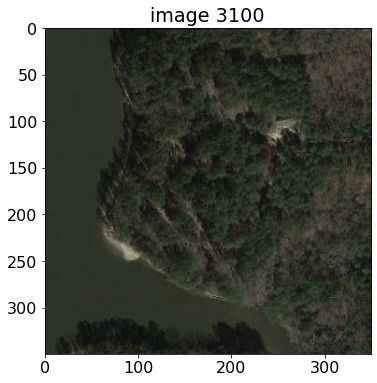

Pulling image 3101, total API requests so far = 45
satimg_NC_3101_Established Campground_17_35.440818_-80.07251.png
waiting for: 4 seconds
Pulling image 3116, total API requests so far = 46
satimg_NC_3116_Established Campground_17_35.364874_-79.989343.png
waiting for: 2 seconds
Pulling image 3280, total API requests so far = 47
satimg_NC_3280_Established Campground_17_35.42445_-82.6552.png
waiting for: 5 seconds
Pulling image 3377, total API requests so far = 48
satimg_NC_3377_Established Campground_17_35.431983_-83.42469200000002.png
waiting for: 3 seconds
Pulling image 3381, total API requests so far = 49
satimg_NC_3381_Established Campground_17_35.23563_-75.53846999999998.png
waiting for: 1 seconds
Pulling image 3453, total API requests so far = 50
satimg_NC_3453_Established Campground_17_35.127312_-75.918625.png
waiting for: 3 seconds
Pulling image 3527, total API requests so far = 51
satimg_NC_3527_Established Campground_17_36.124317_-81.248639.png
waiting for: 1 seconds
Wild Camp

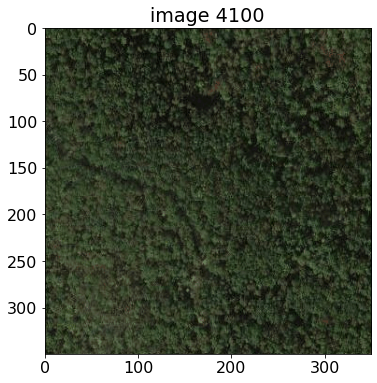

Pulling image 4373, total API requests so far = 25
satimg_NC_4373_Wild Camping_17_36.133935_-81.679958.png
waiting for: 1 seconds
Pulling image 4467, total API requests so far = 26
satimg_NC_4467_Wild Camping_17_35.758744_-82.3809.png
waiting for: 4 seconds
Pulling image 4696, total API requests so far = 27
satimg_NC_4696_Wild Camping_17_34.725741_-76.782668.png
waiting for: 1 seconds
Pulling image 4717, total API requests so far = 28
satimg_NC_4717_Wild Camping_17_34.368248_-77.62780500000002.png
waiting for: 2 seconds
Pulling image 4748, total API requests so far = 29
satimg_NC_4748_Wild Camping_17_35.308068_-82.909112.png
waiting for: 2 seconds
Pulling image 4749, total API requests so far = 30
satimg_NC_4749_Wild Camping_17_35.291584_-82.914026.png
waiting for: 3 seconds
Pulling image 4760, total API requests so far = 31
satimg_NC_4760_Wild Camping_17_35.32556_-82.881843.png
waiting for: 2 seconds
Pulling image 4773, total API requests so far = 32
satimg_NC_4773_Wild Camping_17_35.

waiting for: 3 seconds
Pulling image 7006, total API requests so far = 35
satimg_NC_7006_Informal Campsite_17_35.83674_-82.5135.png
waiting for: 3 seconds
Pulling image 7185, total API requests so far = 36
satimg_NC_7185_Informal Campsite_17_34.641607_-79.017401.png
waiting for: 2 seconds
Pulling image 7418, total API requests so far = 37
satimg_NC_7418_Informal Campsite_17_35.46772100000001_-83.296922.png
waiting for: 3 seconds
Pulling image 7481, total API requests so far = 38
satimg_NC_7481_Informal Campsite_17_35.006612_-83.76535.png
waiting for: 4 seconds
Pulling image 7915, total API requests so far = 39
satimg_NC_7915_Informal Campsite_17_34.210862_-78.02504300000003.png
waiting for: 5 seconds
Pulling image 8235, total API requests so far = 40
satimg_NC_8235_Informal Campsite_17_35.44877800000001_-80.01894399999998.png
waiting for: 2 seconds
Pulling image 8330, total API requests so far = 41
satimg_NC_8330_Informal Campsite_17_34.73623_-76.81338000000002.png
waiting for: 1 secon

waiting for: 5 seconds
Pulling image 2329, total API requests so far = 40
satimg_TN_2329_Established Campground_17_35.5582_-85.38871.png
waiting for: 1 seconds
Pulling image 2339, total API requests so far = 41
satimg_TN_2339_Established Campground_17_35.11684_-85.87413000000002.png
waiting for: 1 seconds
Pulling image 2372, total API requests so far = 42
satimg_TN_2372_Established Campground_17_35.238787_-84.54803000000003.png
waiting for: 4 seconds
Pulling image 2384, total API requests so far = 43
satimg_TN_2384_Established Campground_17_35.593817_-86.703227.png
waiting for: 2 seconds
Pulling image 2444, total API requests so far = 44
satimg_TN_2444_Established Campground_17_36.106511_-86.60709200000002.png
waiting for: 4 seconds
Pulling image 2445, total API requests so far = 45
satimg_TN_2445_Established Campground_17_35.344198_-90.047105.png
waiting for: 3 seconds
Pulling image 2528, total API requests so far = 46
satimg_TN_2528_Established Campground_17_35.66447_-84.84493.png
wa

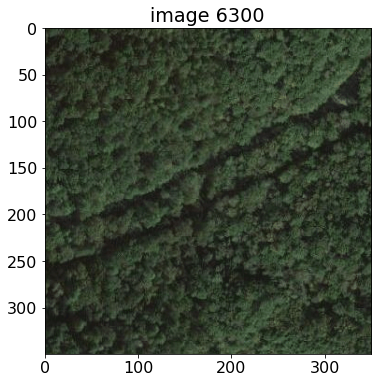

Pulling image 6422, total API requests so far = 16
satimg_TN_6422_Wild Camping_17_35.970943_-82.971434.png
waiting for: 1 seconds
Pulling image 6447, total API requests so far = 17
satimg_TN_6447_Wild Camping_17_35.068184_-84.635244.png
waiting for: 3 seconds
Pulling image 6495, total API requests so far = 18
satimg_TN_6495_Wild Camping_17_36.53694_-84.162754.png
waiting for: 3 seconds
Pulling image 6635, total API requests so far = 19
satimg_TN_6635_Wild Camping_17_36.4901_-82.08075.png
waiting for: 2 seconds
Pulling image 7045, total API requests so far = 20
satimg_TN_7045_Wild Camping_17_36.133849_-82.30886.png
waiting for: 1 seconds
Pulling image 7138, total API requests so far = 21
satimg_TN_7138_Wild Camping_17_35.032996000000004_-85.450802.png
waiting for: 1 seconds
Pulling image 7279, total API requests so far = 22
satimg_TN_7279_Wild Camping_17_35.890787_-87.653578.png
waiting for: 5 seconds
Pulling image 7797, total API requests so far = 23
satimg_TN_7797_Wild Camping_17_36.1

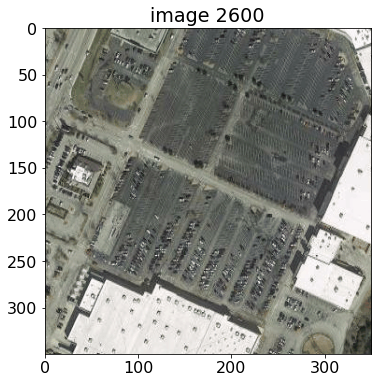

Pulling image 2674, total API requests so far = 17
satimg_TN_2674_Informal Campsite_17_36.032496_-85.621641.png
waiting for: 1 seconds
Pulling image 2824, total API requests so far = 18
satimg_TN_2824_Informal Campsite_17_36.28661_-86.65876999999998.png
waiting for: 5 seconds
Pulling image 2874, total API requests so far = 19
satimg_TN_2874_Informal Campsite_17_36.563715_-87.907426.png
waiting for: 2 seconds
Pulling image 2885, total API requests so far = 20
satimg_TN_2885_Informal Campsite_17_35.97784_-85.720308.png
waiting for: 5 seconds
Pulling image 3233, total API requests so far = 21
satimg_TN_3233_Informal Campsite_17_36.170681_-86.769357.png
waiting for: 1 seconds
Pulling image 3363, total API requests so far = 22
satimg_TN_3363_Informal Campsite_17_35.060816_-85.30570999999998.png
waiting for: 4 seconds
Pulling image 3745, total API requests so far = 23
satimg_TN_3745_Informal Campsite_17_36.015023_-86.618938.png
waiting for: 2 seconds
Pulling image 3764, total API requests so

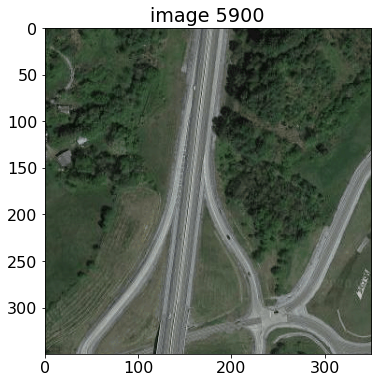

Pulling image 5977, total API requests so far = 46
satimg_TN_5977_Informal Campsite_17_35.137895_-86.564385.png
waiting for: 2 seconds
Pulling image 6091, total API requests so far = 47
satimg_TN_6091_Informal Campsite_17_35.12708_-85.026515.png
waiting for: 5 seconds
Pulling image 6378, total API requests so far = 48
satimg_TN_6378_Informal Campsite_17_36.586995_-82.03329599999998.png
waiting for: 1 seconds
Pulling image 6386, total API requests so far = 49
satimg_TN_6386_Informal Campsite_17_35.202195_-87.061297.png
waiting for: 5 seconds
Pulling image 6699, total API requests so far = 50
satimg_TN_6699_Informal Campsite_17_35.165868_-85.418188.png
waiting for: 5 seconds
Pulling image 7152, total API requests so far = 51
satimg_TN_7152_Informal Campsite_17_35.814226_-86.39482.png
waiting for: 1 seconds
Pulling image 7183, total API requests so far = 52
satimg_TN_7183_Informal Campsite_17_36.509468_-87.271413.png
waiting for: 2 seconds
Pulling image 7223, total API requests so far = 5

waiting for: 2 seconds
Pulling image 2930, total API requests so far = 42
satimg_MI_2930_Established Campground_17_45.833286_-86.99574399999999.png
waiting for: 4 seconds
Pulling image 2933, total API requests so far = 43
satimg_MI_2933_Established Campground_17_45.74615900000001_-84.903345.png
waiting for: 4 seconds
Pulling image 2992, total API requests so far = 44
satimg_MI_2992_Established Campground_17_42.615888_-85.458659.png
waiting for: 2 seconds
Pulling image 3031, total API requests so far = 45
satimg_MI_3031_Established Campground_17_42.780694_-86.198769.png
waiting for: 4 seconds
Pulling image 3086, total API requests so far = 46
satimg_MI_3086_Established Campground_17_42.42548_-84.04111.png
waiting for: 1 seconds
Pulling image 3112, total API requests so far = 47
satimg_MI_3112_Established Campground_17_44.740556_-84.670556.png
waiting for: 3 seconds
Pulling image 3410, total API requests so far = 48
satimg_MI_3410_Established Campground_17_45.983856_-84.969038.png
waitin

waiting for: 4 seconds
Pulling image 1316, total API requests so far = 10
satimg_MI_1316_Informal Campsite_17_46.437632_-86.707893.png
waiting for: 2 seconds
Pulling image 1399, total API requests so far = 11
satimg_MI_1399_Informal Campsite_17_42.263326_-85.219208.png
waiting for: 2 seconds
Pulling image 1581, total API requests so far = 12
satimg_MI_1581_Informal Campsite_17_43.03666_-85.69115500000002.png
waiting for: 1 seconds
Pulling image 1698, total API requests so far = 13
satimg_MI_1698_Informal Campsite_17_43.075893_-86.22462.png
waiting for: 5 seconds
Pulling image 1950, total API requests so far = 14
satimg_MI_1950_Informal Campsite_17_44.263638_-86.323305.png
waiting for: 1 seconds
Pulling image 2528, total API requests so far = 15
satimg_MI_2528_Informal Campsite_17_42.891881_-85.34630600000001.png
waiting for: 3 seconds
Pulling image 2546, total API requests so far = 16
satimg_MI_2546_Informal Campsite_17_42.88595_-85.371738.png
waiting for: 5 seconds
Pulling image 2736,

waiting for: 3 seconds
Pulling image 1421, total API requests so far = 19
satimg_SD_1421_Established Campground_17_43.930135_-99.836498.png
waiting for: 5 seconds
Pulling image 1425, total API requests so far = 20
satimg_SD_1425_Established Campground_17_43.8343_-101.89746.png
waiting for: 5 seconds
Pulling image 1453, total API requests so far = 21
satimg_SD_1453_Established Campground_17_44.079633_-103.72805.png
waiting for: 2 seconds
Pulling image 1454, total API requests so far = 22
satimg_SD_1454_Established Campground_17_43.82715_-103.472483.png
waiting for: 4 seconds
Pulling image 1455, total API requests so far = 23
satimg_SD_1455_Established Campground_17_44.2749_-103.85125.png
waiting for: 1 seconds
Pulling image 1456, total API requests so far = 24
satimg_SD_1456_Established Campground_17_43.839317_-103.5567.png
waiting for: 5 seconds
Pulling image 1513, total API requests so far = 25
satimg_SD_1513_Established Campground_17_43.903591_-103.446301.png
waiting for: 2 seconds
P

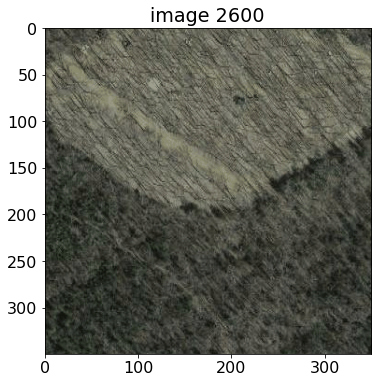

Pulling image 2625, total API requests so far = 40
satimg_SD_2625_Established Campground_17_44.0651_-99.47448.png
waiting for: 5 seconds
Pulling image 2626, total API requests so far = 41
satimg_SD_2626_Established Campground_17_44.361324_-97.13078.png
waiting for: 3 seconds
Pulling image 2791, total API requests so far = 42
satimg_SD_2791_Established Campground_17_45.489417_-98.518368.png
waiting for: 4 seconds
Pulling image 2871, total API requests so far = 43
satimg_SD_2871_Established Campground_17_43.876519_-103.440652.png
waiting for: 3 seconds
Pulling image 2872, total API requests so far = 44
satimg_SD_2872_Established Campground_17_43.607207_-96.705341.png
waiting for: 2 seconds
Pulling image 2893, total API requests so far = 45
satimg_SD_2893_Established Campground_17_44.385306_-97.561003.png
waiting for: 1 seconds
Pulling image 2931, total API requests so far = 46
satimg_SD_2931_Established Campground_17_43.763725_-103.522621.png
waiting for: 5 seconds
Pulling image 2958, to

waiting for: 3 seconds
Pulling image 7302, total API requests so far = 46
satimg_SD_7302_Wild Camping_17_43.901069_-103.359183.png
waiting for: 2 seconds
Pulling image 7322, total API requests so far = 47
satimg_SD_7322_Wild Camping_17_44.064503_-103.48801.png
waiting for: 1 seconds
Pulling image 7335, total API requests so far = 48
satimg_SD_7335_Wild Camping_17_43.916975_-103.601721.png
waiting for: 3 seconds
Pulling image 7339, total API requests so far = 49
satimg_SD_7339_Wild Camping_17_43.905076_-102.229724.png
waiting for: 5 seconds
Pulling image 7821, total API requests so far = 50
satimg_SD_7821_Wild Camping_17_44.01294_-103.52363.png
waiting for: 2 seconds
Pulling image 8247, total API requests so far = 51
satimg_SD_8247_Wild Camping_17_43.9345_-103.44949.png
waiting for: 4 seconds
Pulling image 8287, total API requests so far = 52
satimg_SD_8287_Wild Camping_17_43.889702_-102.226709.png
waiting for: 3 seconds
Pulling image 8377, total API requests so far = 53
satimg_SD_8377_

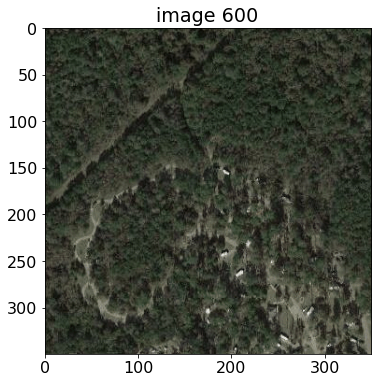

Pulling image 689, total API requests so far = 8
satimg_LA_689_Established Campground_17_29.258164_-89.95662800000002.png
waiting for: 2 seconds
Pulling image 1083, total API requests so far = 9
satimg_LA_1083_Established Campground_17_31.95802_-91.202763.png
waiting for: 2 seconds
Pulling image 1122, total API requests so far = 10
satimg_LA_1122_Established Campground_17_30.51478_-91.71459.png
waiting for: 5 seconds
Pulling image 1184, total API requests so far = 11
satimg_LA_1184_Established Campground_17_30.833617_-92.281486.png
waiting for: 2 seconds
Pulling image 1217, total API requests so far = 12
satimg_LA_1217_Established Campground_17_30.257283_-91.987905.png
waiting for: 3 seconds
Pulling image 1554, total API requests so far = 13
satimg_LA_1554_Established Campground_17_31.324676_-92.728511.png
waiting for: 3 seconds
Pulling image 1887, total API requests so far = 14
satimg_LA_1887_Established Campground_17_31.541177_-93.02616.png
waiting for: 5 seconds
Pulling image 2051, 

waiting for: 1 seconds
Informal Campsite
LA
Pulling image 189, total API requests so far = 0
satimg_LA_189_Informal Campsite_17_29.759487_-90.101917.png
waiting for: 4 seconds
Pulling image 268, total API requests so far = 1
satimg_LA_268_Informal Campsite_17_30.005495_-90.03887900000002.png
waiting for: 5 seconds
Pulling image 271, total API requests so far = 2
satimg_LA_271_Informal Campsite_17_32.325992_-90.990382.png
waiting for: 5 seconds
Pulling image 495, total API requests so far = 3
satimg_LA_495_Informal Campsite_17_30.231265000000004_-93.221221.png
waiting for: 2 seconds
Pulling image 501, total API requests so far = 4
satimg_LA_501_Informal Campsite_17_30.272133_-89.870605.png
waiting for: 5 seconds
Pulling image 535, total API requests so far = 5
satimg_LA_535_Informal Campsite_17_30.002333_-90.092734.png
waiting for: 5 seconds
Pulling image 1042, total API requests so far = 6
satimg_LA_1042_Informal Campsite_17_30.074686_-90.498582.png
waiting for: 4 seconds
Pulling image

waiting for: 2 seconds
Pulling image 139, total API requests so far = 1
satimg_GA_139_Established Campground_17_31.847616_-83.94438000000002.png
waiting for: 4 seconds
Pulling image 177, total API requests so far = 2
satimg_GA_177_Established Campground_17_34.29605_-83.164941.png
waiting for: 5 seconds
Pulling image 256, total API requests so far = 3
satimg_GA_256_Established Campground_17_32.08552_-82.13328.png
waiting for: 4 seconds
Pulling image 543, total API requests so far = 4
satimg_GA_543_Established Campground_17_33.799614_-84.128959.png
waiting for: 4 seconds
Pulling image 574, total API requests so far = 5
satimg_GA_574_Established Campground_17_31.95273_-81.04669100000002.png
waiting for: 5 seconds
Pulling image 607, total API requests so far = 6
satimg_GA_607_Established Campground_17_33.667881_-82.380136.png
waiting for: 4 seconds
Pulling image 645, total API requests so far = 7
satimg_GA_645_Established Campground_17_34.906147999999995_-83.405941.png
waiting for: 4 secon

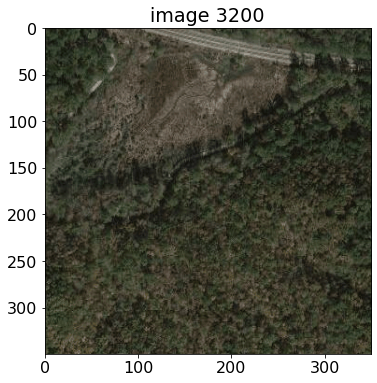

Pulling image 3227, total API requests so far = 37
satimg_GA_3227_Established Campground_17_34.777599_-83.397983.png
waiting for: 5 seconds
Pulling image 3250, total API requests so far = 38
satimg_GA_3250_Established Campground_17_33.720728_-83.29101700000002.png
waiting for: 1 seconds
Pulling image 3279, total API requests so far = 39
satimg_GA_3279_Established Campground_17_31.106578000000006_-81.412596.png
waiting for: 5 seconds
Pulling image 3283, total API requests so far = 40
satimg_GA_3283_Established Campground_17_30.844528000000004_-81.55189399999998.png
waiting for: 1 seconds
Pulling image 3364, total API requests so far = 41
satimg_GA_3364_Established Campground_17_34.723033_-83.7223.png
waiting for: 3 seconds
Pulling image 3382, total API requests so far = 42
satimg_GA_3382_Established Campground_17_31.52508_-82.76697.png
waiting for: 2 seconds
Pulling image 3423, total API requests so far = 43
satimg_GA_3423_Established Campground_17_32.221377000000004_-81.260349.png
wait

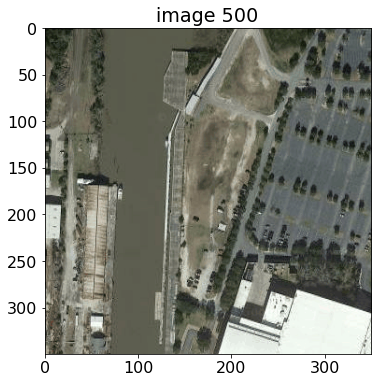

Pulling image 589, total API requests so far = 3
satimg_GA_589_Informal Campsite_17_34.702_-83.7894.png
waiting for: 4 seconds
Pulling image 1306, total API requests so far = 4
satimg_GA_1306_Informal Campsite_17_34.709288_-83.788333.png
waiting for: 5 seconds
Pulling image 1307, total API requests so far = 5
satimg_GA_1307_Informal Campsite_17_34.756933000000004_-84.023232.png
waiting for: 5 seconds
Pulling image 1448, total API requests so far = 6
satimg_GA_1448_Informal Campsite_17_33.996585_-84.68813399999998.png
waiting for: 5 seconds
Pulling image 1653, total API requests so far = 7
satimg_GA_1653_Informal Campsite_17_32.142305_-81.24378100000001.png
waiting for: 1 seconds
Pulling image 1703, total API requests so far = 8
satimg_GA_1703_Informal Campsite_17_31.980562_-81.17407.png
waiting for: 3 seconds
Pulling image 1708, total API requests so far = 9
satimg_GA_1708_Informal Campsite_17_30.77821_-81.62077.png
waiting for: 2 seconds
Pulling image 1783, total API requests so far =

waiting for: 4 seconds
Pulling image 3011, total API requests so far = 20
satimg_ME_3011_Established Campground_17_45.18969_-70.46229.png
waiting for: 2 seconds
Pulling image 3032, total API requests so far = 21
satimg_ME_3032_Established Campground_17_45.0067_-70.58072.png
waiting for: 5 seconds
Pulling image 3145, total API requests so far = 22
satimg_ME_3145_Established Campground_17_43.830566_-70.06788.png
waiting for: 3 seconds
Pulling image 3158, total API requests so far = 23
satimg_ME_3158_Established Campground_17_43.505464_-70.417011.png
waiting for: 5 seconds
Pulling image 3632, total API requests so far = 24
satimg_ME_3632_Established Campground_17_44.919736_-67.002942.png
waiting for: 3 seconds
Pulling image 3680, total API requests so far = 25
satimg_ME_3680_Established Campground_17_47.254294_-68.594302.png
waiting for: 2 seconds
Pulling image 3681, total API requests so far = 26
satimg_ME_3681_Established Campground_17_43.97206_-70.60982.png
waiting for: 2 seconds
Wild 

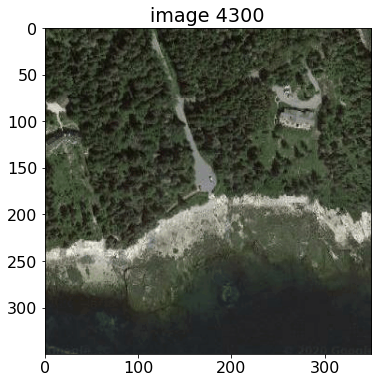

Pulling image 4331, total API requests so far = 17
satimg_ME_4331_Wild Camping_17_44.462586_-68.70831700000001.png
waiting for: 2 seconds
Pulling image 4397, total API requests so far = 18
satimg_ME_4397_Wild Camping_17_44.549945_-67.628586.png
waiting for: 1 seconds
Pulling image 4537, total API requests so far = 19
satimg_ME_4537_Wild Camping_17_44.862135_-66.984217.png
waiting for: 2 seconds
Pulling image 4538, total API requests so far = 20
satimg_ME_4538_Wild Camping_17_44.71352_-67.458974.png
waiting for: 5 seconds
Pulling image 5220, total API requests so far = 21
satimg_ME_5220_Wild Camping_17_43.854857_-70.104651.png
waiting for: 3 seconds
Pulling image 5526, total API requests so far = 22
satimg_ME_5526_Wild Camping_17_45.8491_-69.06385999999999.png
waiting for: 5 seconds
Pulling image 5779, total API requests so far = 23
satimg_ME_5779_Wild Camping_17_45.02505_-70.155348.png
waiting for: 3 seconds
Pulling image 6256, total API requests so far = 24
satimg_ME_6256_Wild Camping

waiting for: 3 seconds
Water
ME
Pulling image 4496, total API requests so far = 0
satimg_ME_4496_Water_17_44.360788_-68.19888900000001.png
waiting for: 2 seconds
Pulling image 6866, total API requests so far = 1
satimg_ME_6866_Water_17_44.314533_-68.19479100000001.png
waiting for: 3 seconds
Pulling image 6912, total API requests so far = 2
satimg_ME_6912_Water_17_44.123704_-69.118246.png
waiting for: 4 seconds
Short-term Parking
ME
Eco-Friendly
ME
Pulling image 3623, total API requests so far = 0
satimg_ME_3623_Eco-Friendly_17_43.707595_-70.318584.png
waiting for: 5 seconds
Established Campground
PA
Pulling image 355, total API requests so far = 0
satimg_PA_355_Established Campground_17_41.81916_-78.99264000000002.png
waiting for: 4 seconds
Pulling image 548, total API requests so far = 1
satimg_PA_548_Established Campground_17_39.88192_-79.4942.png
waiting for: 5 seconds
Pulling image 625, total API requests so far = 2
satimg_PA_625_Established Campground_17_40.666365_-76.405194.png
w

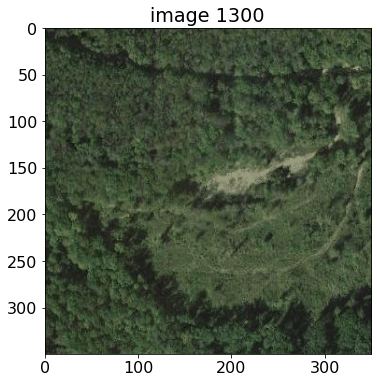

Pulling image 1369, total API requests so far = 3
satimg_PA_1369_Wild Camping_17_41.46836_-79.024889.png
waiting for: 1 seconds
Pulling image 1570, total API requests so far = 4
satimg_PA_1570_Wild Camping_17_41.205534_-75.61049200000002.png
waiting for: 5 seconds
Pulling image 1572, total API requests so far = 5
satimg_PA_1572_Wild Camping_17_41.20704_-75.615296.png
waiting for: 2 seconds
Pulling image 1573, total API requests so far = 6
satimg_PA_1573_Wild Camping_17_41.205906_-75.611248.png
waiting for: 4 seconds
Pulling image 1922, total API requests so far = 7
satimg_PA_1922_Wild Camping_17_41.466695_-78.86471999999998.png
waiting for: 5 seconds
Pulling image 2626, total API requests so far = 8
satimg_PA_2626_Wild Camping_17_41.356663_-79.070526.png
waiting for: 5 seconds
Pulling image 2924, total API requests so far = 9
satimg_PA_2924_Wild Camping_17_41.024655_-75.54213399999998.png
waiting for: 5 seconds
Pulling image 2955, total API requests so far = 10
satimg_PA_2955_Wild Camp

waiting for: 5 seconds
Pulling image 4922, total API requests so far = 39
satimg_PA_4922_Informal Campsite_17_40.224613_-76.926772.png
waiting for: 5 seconds
Pulling image 4932, total API requests so far = 40
satimg_PA_4932_Informal Campsite_17_40.321785_-76.561356.png
waiting for: 4 seconds
Pulling image 5204, total API requests so far = 41
satimg_PA_5204_Informal Campsite_17_40.770425_-76.221414.png
waiting for: 1 seconds
Pulling image 5300, total API requests so far = 42
satimg_PA_5300_Informal Campsite_17_40.319973_-76.56222.png
waiting for: 3 seconds


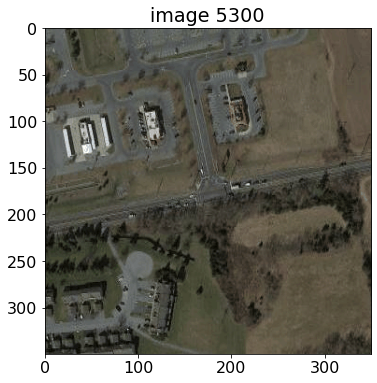

Pulling image 6146, total API requests so far = 43
satimg_PA_6146_Informal Campsite_17_40.415559_-75.920361.png
waiting for: 4 seconds
Pulling image 6485, total API requests so far = 44
satimg_PA_6485_Informal Campsite_17_39.860006_-75.689563.png
waiting for: 3 seconds
Pulling image 6490, total API requests so far = 45
satimg_PA_6490_Informal Campsite_17_40.405234_-77.009848.png
waiting for: 3 seconds
Pulling image 6670, total API requests so far = 46
satimg_PA_6670_Informal Campsite_17_40.224077_-80.210256.png
waiting for: 3 seconds
Pulling image 7553, total API requests so far = 47
satimg_PA_7553_Informal Campsite_17_40.032043_-76.24175100000002.png
waiting for: 3 seconds
Pulling image 8495, total API requests so far = 48
satimg_PA_8495_Informal Campsite_17_40.3742_-75.96401.png
waiting for: 1 seconds
Pulling image 8499, total API requests so far = 49
satimg_PA_8499_Informal Campsite_17_39.89572_-75.25408.png
waiting for: 2 seconds
Pulling image 8500, total API requests so far = 50
s

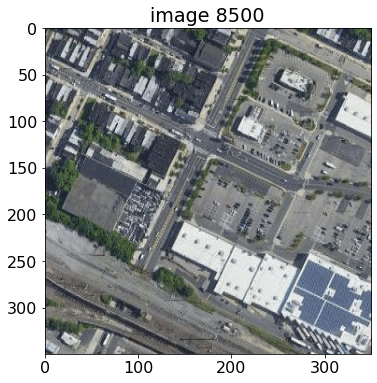

Pulling image 8625, total API requests so far = 51
satimg_PA_8625_Informal Campsite_17_39.94017_-75.1547.png
waiting for: 3 seconds
Showers
PA
Pulling image 1512, total API requests so far = 0
satimg_PA_1512_Showers_17_42.162373_-80.080042.png
waiting for: 1 seconds
Pulling image 1513, total API requests so far = 1
satimg_PA_1513_Showers_17_42.171954_-80.088121.png
waiting for: 2 seconds
Pulling image 2801, total API requests so far = 2
satimg_PA_2801_Showers_17_39.994353_-76.635857.png
waiting for: 1 seconds
Pulling image 4916, total API requests so far = 3
satimg_PA_4916_Showers_17_40.233337_-76.944851.png
waiting for: 5 seconds
Water
PA
Pulling image 1102, total API requests so far = 0
satimg_PA_1102_Water_17_41.867753_-78.52253.png
waiting for: 2 seconds
Short-term Parking
PA
Pulling image 1163, total API requests so far = 0
satimg_PA_1163_Short-term Parking_17_39.903664_-75.17902600000002.png
waiting for: 3 seconds
Eco-Friendly
PA
Established Campground
NE
Pulling image 67, total 

waiting for: 1 seconds
Pulling image 8003, total API requests so far = 10
satimg_NE_8003_Wild Camping_17_41.839136_-100.338558.png
waiting for: 1 seconds
Pulling image 8034, total API requests so far = 11
satimg_NE_8034_Wild Camping_17_40.954504_-100.398755.png
waiting for: 1 seconds
Pulling image 8092, total API requests so far = 12
satimg_NE_8092_Wild Camping_17_42.76763_-103.926559.png
waiting for: 1 seconds
Pulling image 8093, total API requests so far = 13
satimg_NE_8093_Wild Camping_17_42.66107_-103.57638.png
waiting for: 3 seconds
Pulling image 8094, total API requests so far = 14
satimg_NE_8094_Wild Camping_17_41.92464_-103.92992.png
waiting for: 5 seconds
Pulling image 8095, total API requests so far = 15
satimg_NE_8095_Wild Camping_17_42.40673_-102.45676.png
waiting for: 1 seconds
Pulling image 8096, total API requests so far = 16
satimg_NE_8096_Wild Camping_17_42.91914000000001_-102.03887.png
waiting for: 3 seconds
Pulling image 8097, total API requests so far = 17
satimg_NE

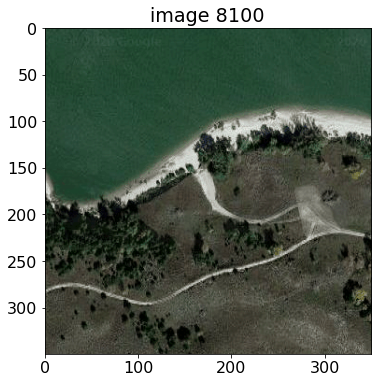

Pulling image 8109, total API requests so far = 21
satimg_NE_8109_Wild Camping_17_41.11011_-101.75333.png
waiting for: 4 seconds
Pulling image 8110, total API requests so far = 22
satimg_NE_8110_Wild Camping_17_41.19913_-101.00178.png
waiting for: 4 seconds
Pulling image 8111, total API requests so far = 23
satimg_NE_8111_Wild Camping_17_41.19336_-100.89593.png
waiting for: 1 seconds
Pulling image 8112, total API requests so far = 24
satimg_NE_8112_Wild Camping_17_41.09151_-100.64994.png
waiting for: 1 seconds
Pulling image 8113, total API requests so far = 25
satimg_NE_8113_Wild Camping_17_40.82511_-99.93866.png
waiting for: 3 seconds
Pulling image 8114, total API requests so far = 26
satimg_NE_8114_Wild Camping_17_40.69885_-99.61776.png
waiting for: 3 seconds
Pulling image 8115, total API requests so far = 27
satimg_NE_8115_Wild Camping_17_40.68755_-99.38306.png
waiting for: 5 seconds
Pulling image 8116, total API requests so far = 28
satimg_NE_8116_Wild Camping_17_40.68755_-99.38306

waiting for: 1 seconds
Pulling image 1657, total API requests so far = 21
satimg_MN_1657_Established Campground_17_46.994563_-91.730278.png
waiting for: 4 seconds
Pulling image 1659, total API requests so far = 22
satimg_MN_1659_Established Campground_17_43.788444_-94.731588.png
waiting for: 3 seconds
Pulling image 2332, total API requests so far = 23
satimg_MN_2332_Established Campground_17_46.949728_-93.207218.png
waiting for: 3 seconds
Pulling image 2493, total API requests so far = 24
satimg_MN_2493_Established Campground_17_46.479679_-93.95618.png
waiting for: 5 seconds
Pulling image 2575, total API requests so far = 25
satimg_MN_2575_Established Campground_17_48.643474_-94.102178.png
waiting for: 3 seconds
Pulling image 2579, total API requests so far = 26
satimg_MN_2579_Established Campground_17_44.38666_-96.174832.png
waiting for: 3 seconds
Pulling image 2629, total API requests so far = 27
satimg_MN_2629_Established Campground_17_44.7789_-93.16386.png
waiting for: 3 seconds
Pu

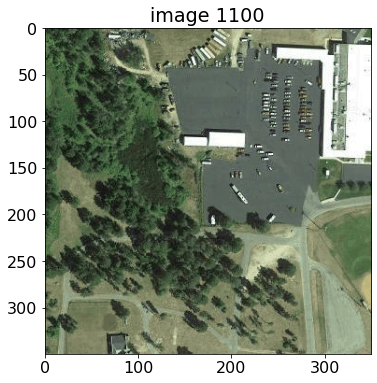

Pulling image 1128, total API requests so far = 5
satimg_MN_1128_Informal Campsite_17_43.686421_-92.988035.png
waiting for: 3 seconds
Pulling image 1301, total API requests so far = 6
satimg_MN_1301_Informal Campsite_17_46.666416_-92.475598.png
waiting for: 2 seconds
Pulling image 1381, total API requests so far = 7
satimg_MN_1381_Informal Campsite_17_43.639814_-95.022001.png
waiting for: 2 seconds
Pulling image 1521, total API requests so far = 8
satimg_MN_1521_Informal Campsite_17_43.663722_-94.117988.png
waiting for: 3 seconds
Pulling image 1981, total API requests so far = 9
satimg_MN_1981_Informal Campsite_17_46.132835_-92.857514.png
waiting for: 3 seconds
Pulling image 3019, total API requests so far = 10
satimg_MN_3019_Informal Campsite_17_46.92481_-95.03423.png
waiting for: 1 seconds
Pulling image 3084, total API requests so far = 11
satimg_MN_3084_Informal Campsite_17_45.571424_-93.197001.png
waiting for: 5 seconds
Pulling image 3378, total API requests so far = 12
satimg_MN_3

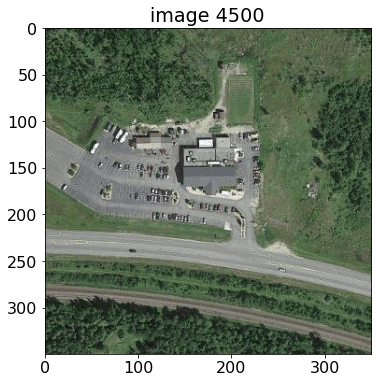

Pulling image 4523, total API requests so far = 17
satimg_MN_4523_Informal Campsite_17_46.729846_-92.206399.png
waiting for: 4 seconds
Pulling image 6928, total API requests so far = 18
satimg_MN_6928_Informal Campsite_17_43.636838_-95.981102.png
waiting for: 5 seconds
Pulling image 7259, total API requests so far = 19
satimg_MN_7259_Informal Campsite_17_46.947697_-91.7919.png
waiting for: 5 seconds
Pulling image 7323, total API requests so far = 20
satimg_MN_7323_Informal Campsite_17_45.1882_-93.5338.png
waiting for: 2 seconds
Pulling image 7324, total API requests so far = 21
satimg_MN_7324_Informal Campsite_17_45.983689_-93.278915.png
waiting for: 2 seconds
Pulling image 7326, total API requests so far = 22
satimg_MN_7326_Informal Campsite_17_44.767097_-93.579225.png
waiting for: 1 seconds
Pulling image 7327, total API requests so far = 23
satimg_MN_7327_Informal Campsite_17_43.63834_-95.966821.png
waiting for: 5 seconds
Pulling image 7340, total API requests so far = 24
satimg_MN_7

waiting for: 3 seconds
Wild Camping
AR
Pulling image 776, total API requests so far = 0
satimg_AR_776_Wild Camping_17_35.684017_-93.59827.png
waiting for: 1 seconds
Pulling image 1279, total API requests so far = 1
satimg_AR_1279_Wild Camping_17_34.828088_-91.467116.png
waiting for: 3 seconds
Pulling image 1458, total API requests so far = 2
satimg_AR_1458_Wild Camping_17_34.432522_-94.056213.png
waiting for: 2 seconds
Pulling image 2061, total API requests so far = 3
satimg_AR_2061_Wild Camping_17_34.666606_-93.88606.png
waiting for: 1 seconds
Pulling image 2064, total API requests so far = 4
satimg_AR_2064_Wild Camping_17_34.609937_-93.344256.png
waiting for: 4 seconds
Pulling image 2084, total API requests so far = 5
satimg_AR_2084_Wild Camping_17_33.666053000000005_-93.056818.png
waiting for: 1 seconds
Pulling image 2113, total API requests so far = 6
satimg_AR_2113_Wild Camping_17_34.269734_-93.225134.png
waiting for: 1 seconds
Pulling image 2192, total API requests so far = 7
sat

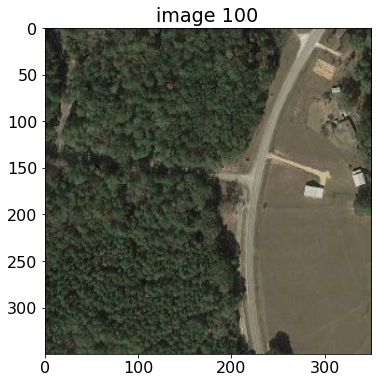

Pulling image 269, total API requests so far = 2
satimg_MS_269_Established Campground_17_34.046306_-88.940066.png
waiting for: 5 seconds
Pulling image 426, total API requests so far = 3
satimg_MS_426_Established Campground_17_32.088591_-90.798459.png
waiting for: 3 seconds
Pulling image 496, total API requests so far = 4
satimg_MS_496_Established Campground_17_30.39658_-88.79762.png
waiting for: 3 seconds
Pulling image 562, total API requests so far = 5
satimg_MS_562_Established Campground_17_30.570085_-89.130429.png
waiting for: 2 seconds
Pulling image 569, total API requests so far = 6
satimg_MS_569_Established Campground_17_30.372481_-88.630503.png
waiting for: 1 seconds
Pulling image 702, total API requests so far = 7
satimg_MS_702_Established Campground_17_32.50075_-88.811695.png
waiting for: 5 seconds
Pulling image 840, total API requests so far = 8
satimg_MS_840_Established Campground_17_34.136148_-89.884438.png
waiting for: 4 seconds
Pulling image 1107, total API requests so fa

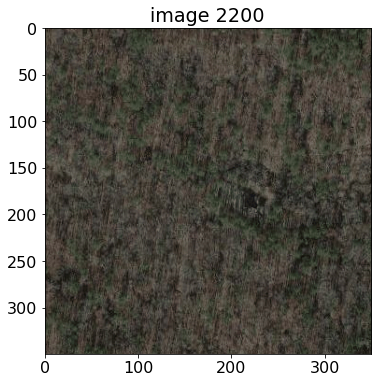

Pulling image 2214, total API requests so far = 24
satimg_MS_2214_Established Campground_17_31.596945_-91.216106.png
waiting for: 1 seconds
Pulling image 2218, total API requests so far = 25
satimg_MS_2218_Established Campground_17_30.384439_-89.462914.png
waiting for: 4 seconds
Pulling image 2383, total API requests so far = 26
satimg_MS_2383_Established Campground_17_31.91222_-89.789301.png
waiting for: 2 seconds
Pulling image 2473, total API requests so far = 27
satimg_MS_2473_Established Campground_17_31.05388_-89.117473.png
waiting for: 5 seconds
Pulling image 2474, total API requests so far = 28
satimg_MS_2474_Established Campground_17_32.366673_-89.562522.png
waiting for: 5 seconds
Pulling image 2985, total API requests so far = 29
satimg_MS_2985_Established Campground_17_34.656471_-89.461586.png
waiting for: 5 seconds
Pulling image 3131, total API requests so far = 30
satimg_MS_3131_Established Campground_17_31.603027_-91.234083.png
waiting for: 1 seconds
Pulling image 3142, to

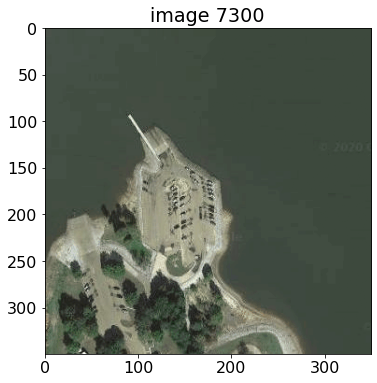

Pulling image 7515, total API requests so far = 28
satimg_MS_7515_Informal Campsite_17_30.43878_-88.618655.png
waiting for: 2 seconds
Pulling image 7538, total API requests so far = 29
satimg_MS_7538_Informal Campsite_17_30.334616_-89.190119.png
waiting for: 3 seconds
Pulling image 7554, total API requests so far = 30
satimg_MS_7554_Informal Campsite_17_31.553729_-91.412721.png
waiting for: 2 seconds
Pulling image 8027, total API requests so far = 31
satimg_MS_8027_Informal Campsite_17_30.414201_-88.822968.png
waiting for: 4 seconds
Pulling image 8572, total API requests so far = 32
satimg_MS_8572_Informal Campsite_17_30.461308_-88.436571.png
waiting for: 5 seconds
Pulling image 8577, total API requests so far = 33
satimg_MS_8577_Informal Campsite_17_33.84508_-91.034613.png
waiting for: 4 seconds
Pulling image 8645, total API requests so far = 34
satimg_MS_8645_Informal Campsite_17_30.67962_-89.03801700000002.png
waiting for: 1 seconds
Pulling image 8662, total API requests so far = 35

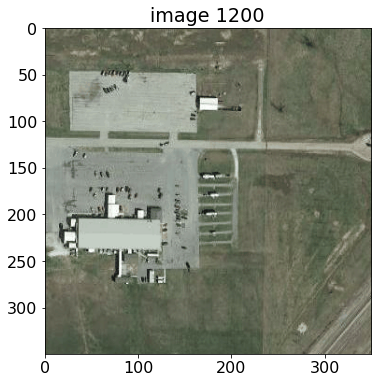

Pulling image 1208, total API requests so far = 20
satimg_OK_1208_Established Campground_17_33.75308_-97.12728.png
waiting for: 2 seconds
Pulling image 1254, total API requests so far = 21
satimg_OK_1254_Established Campground_17_36.256681_-97.338364.png
waiting for: 3 seconds
Pulling image 1347, total API requests so far = 22
satimg_OK_1347_Established Campground_17_36.454213_-99.291665.png
waiting for: 5 seconds
Pulling image 1414, total API requests so far = 23
satimg_OK_1414_Established Campground_17_35.943866_-98.425566.png
waiting for: 4 seconds
Pulling image 1658, total API requests so far = 24
satimg_OK_1658_Established Campground_17_36.926112_-96.102295.png
waiting for: 4 seconds
Pulling image 1713, total API requests so far = 25
satimg_OK_1713_Established Campground_17_36.095761_-94.829998.png
waiting for: 4 seconds
Pulling image 1757, total API requests so far = 26
satimg_OK_1757_Established Campground_17_36.827366_-99.776512.png
waiting for: 3 seconds
Pulling image 1897, to

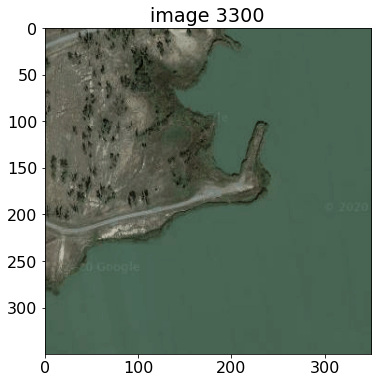

Pulling image 5039, total API requests so far = 5
satimg_OK_5039_Wild Camping_17_34.59512_-94.56154.png
waiting for: 5 seconds
Pulling image 5398, total API requests so far = 6
satimg_OK_5398_Wild Camping_17_35.77265999999999_-99.83457.png
waiting for: 5 seconds
Pulling image 5653, total API requests so far = 7
satimg_OK_5653_Wild Camping_17_36.66204000000001_-96.34100000000001.png
waiting for: 4 seconds
Pulling image 6656, total API requests so far = 8
satimg_OK_6656_Wild Camping_17_34.611142_-94.616862.png
waiting for: 3 seconds
Pulling image 6657, total API requests so far = 9
satimg_OK_6657_Wild Camping_17_34.590105_-94.547268.png
waiting for: 4 seconds
Pulling image 6658, total API requests so far = 10
satimg_OK_6658_Wild Camping_17_34.598944_-94.503834.png
waiting for: 2 seconds
Pulling image 6659, total API requests so far = 11
satimg_OK_6659_Wild Camping_17_34.609191_-94.515262.png
waiting for: 4 seconds
Pulling image 6944, total API requests so far = 12
satimg_OK_6944_Wild Cam

waiting for: 3 seconds
Pulling image 3166, total API requests so far = 23
satimg_AL_3166_Established Campground_17_31.04452_-87.21694000000002.png
waiting for: 4 seconds
Pulling image 3201, total API requests so far = 24
satimg_AL_3201_Established Campground_17_33.526013_-86.039124.png
waiting for: 2 seconds
Pulling image 3268, total API requests so far = 25
satimg_AL_3268_Established Campground_17_31.996721_-85.129453.png
waiting for: 1 seconds
Pulling image 3300, total API requests so far = 26
satimg_AL_3300_Established Campground_17_31.733768_-88.196034.png
waiting for: 5 seconds


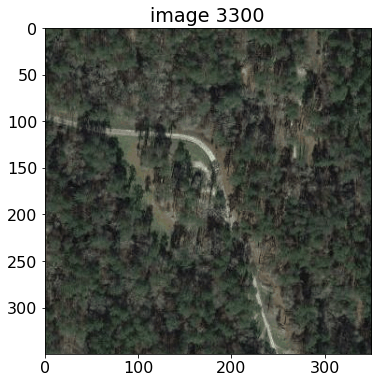

Pulling image 3314, total API requests so far = 27
satimg_AL_3314_Established Campground_17_31.854983_-88.1596.png
waiting for: 1 seconds
Pulling image 3400, total API requests so far = 28
satimg_AL_3400_Established Campground_17_30.99523_-86.31721.png
waiting for: 1 seconds


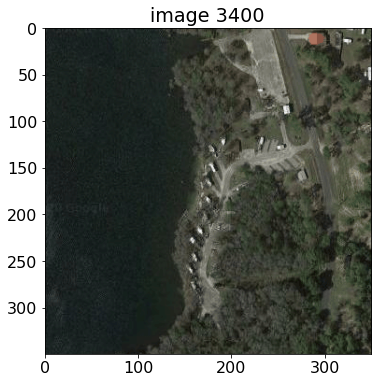

Pulling image 3479, total API requests so far = 29
satimg_AL_3479_Established Campground_17_32.88297_-87.43815.png
waiting for: 3 seconds
Pulling image 3544, total API requests so far = 30
satimg_AL_3544_Established Campground_17_34.180688_-85.815586.png
waiting for: 3 seconds
Pulling image 3554, total API requests so far = 31
satimg_AL_3554_Established Campground_17_30.95837_-87.87016.png
waiting for: 3 seconds
Pulling image 3567, total API requests so far = 32
satimg_AL_3567_Established Campground_17_34.475508000000005_-86.049208.png
waiting for: 5 seconds
Pulling image 3608, total API requests so far = 33
satimg_AL_3608_Established Campground_17_32.19153_-87.95613.png
waiting for: 5 seconds
Wild Camping
AL
Pulling image 590, total API requests so far = 0
satimg_AL_590_Wild Camping_17_32.668823_-85.326677.png
waiting for: 5 seconds
Pulling image 1984, total API requests so far = 1
satimg_AL_1984_Wild Camping_17_32.48662_-86.41170799999998.png
waiting for: 5 seconds
Pulling image 2205

waiting for: 2 seconds
Pulling image 434, total API requests so far = 1
satimg_KS_434_Established Campground_17_38.904362_-98.528929.png
waiting for: 3 seconds
Pulling image 501, total API requests so far = 2
satimg_KS_501_Established Campground_17_39.109112_-97.57269.png
waiting for: 4 seconds
Pulling image 555, total API requests so far = 3
satimg_KS_555_Established Campground_17_38.362636_-97.099943.png
waiting for: 4 seconds
Pulling image 687, total API requests so far = 4
satimg_KS_687_Established Campground_17_39.0671_-96.93305.png
waiting for: 2 seconds
Pulling image 1291, total API requests so far = 5
satimg_KS_1291_Established Campground_17_39.187687_-100.872579.png
waiting for: 2 seconds
Pulling image 1354, total API requests so far = 6
satimg_KS_1354_Established Campground_17_38.079002_-97.584775.png
waiting for: 3 seconds
Pulling image 1569, total API requests so far = 7
satimg_KS_1569_Established Campground_17_38.876998_-97.622915.png
waiting for: 1 seconds
Pulling image 1

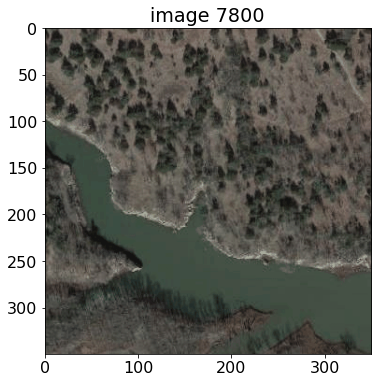

Pulling image 7966, total API requests so far = 12
satimg_KS_7966_Wild Camping_17_38.613371_-97.704446.png
waiting for: 2 seconds
Pulling image 8165, total API requests so far = 13
satimg_KS_8165_Wild Camping_17_39.59391_-95.08001.png
waiting for: 5 seconds
Pulling image 8434, total API requests so far = 14
satimg_KS_8434_Wild Camping_17_39.327431_-101.901093.png
waiting for: 1 seconds
Informal Campsite
KS
Pulling image 84, total API requests so far = 0
satimg_KS_84_Informal Campsite_17_39.786548_-100.001997.png
waiting for: 5 seconds
Pulling image 647, total API requests so far = 1
satimg_KS_647_Informal Campsite_17_37.769276_-100.061436.png
waiting for: 4 seconds
Pulling image 749, total API requests so far = 2
satimg_KS_749_Informal Campsite_17_37.663632_-96.509963.png
waiting for: 2 seconds
Pulling image 1075, total API requests so far = 3
satimg_KS_1075_Informal Campsite_17_37.043937_-95.580379.png
waiting for: 3 seconds
Pulling image 1084, total API requests so far = 4
satimg_KS_

waiting for: 4 seconds
Pulling image 3362, total API requests so far = 23
satimg_SC_3362_Established Campground_17_33.44855_-80.70454000000002.png
waiting for: 5 seconds
Pulling image 3363, total API requests so far = 24
satimg_SC_3363_Established Campground_17_33.44855_-80.70454000000002.png
waiting for: 3 seconds
Pulling image 3403, total API requests so far = 25
satimg_SC_3403_Established Campground_17_33.352872999999995_-79.320102.png
waiting for: 1 seconds
Pulling image 3612, total API requests so far = 26
satimg_SC_3612_Established Campground_17_33.403325_-80.23429200000002.png
waiting for: 2 seconds
Wild Camping
SC
Pulling image 190, total API requests so far = 0
satimg_SC_190_Wild Camping_17_34.986124_-82.896727.png
waiting for: 2 seconds
Pulling image 243, total API requests so far = 1
satimg_SC_243_Wild Camping_17_33.15466_-79.367488.png
waiting for: 3 seconds
Pulling image 478, total API requests so far = 2
satimg_SC_478_Wild Camping_17_33.177655_-79.4964.png
waiting for: 3 

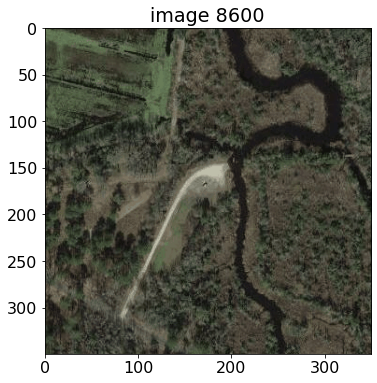

Pulling image 8601, total API requests so far = 21
satimg_SC_8601_Wild Camping_17_32.40833_-80.46722.png
waiting for: 3 seconds
Pulling image 8602, total API requests so far = 22
satimg_SC_8602_Wild Camping_17_32.28699_-81.11793.png
waiting for: 3 seconds
Informal Campsite
SC
Pulling image 309, total API requests so far = 0
satimg_SC_309_Informal Campsite_17_35.0999_-80.93445.png
waiting for: 2 seconds
Pulling image 317, total API requests so far = 1
satimg_SC_317_Informal Campsite_17_34.04543_-81.19123.png
waiting for: 4 seconds
Pulling image 318, total API requests so far = 2
satimg_SC_318_Informal Campsite_17_33.94906_-81.02972.png
waiting for: 1 seconds
Pulling image 319, total API requests so far = 3
satimg_SC_319_Informal Campsite_17_33.55997_-80.2035.png
waiting for: 5 seconds
Pulling image 1030, total API requests so far = 4
satimg_SC_1030_Informal Campsite_17_32.823164_-80.081462.png
waiting for: 1 seconds
Pulling image 1443, total API requests so far = 5
satimg_SC_1443_Inform

waiting for: 2 seconds
Pulling image 2453, total API requests so far = 21
satimg_WI_2453_Established Campground_17_46.462743_-90.529833.png
waiting for: 3 seconds
Pulling image 2532, total API requests so far = 22
satimg_WI_2532_Established Campground_17_43.65661400000001_-87.726639.png
waiting for: 5 seconds
Pulling image 2554, total API requests so far = 23
satimg_WI_2554_Established Campground_17_43.56517_-89.80238299999998.png
waiting for: 3 seconds
Pulling image 2613, total API requests so far = 24
satimg_WI_2613_Established Campground_17_46.67609_-90.87978.png
waiting for: 1 seconds
Pulling image 2648, total API requests so far = 25
satimg_WI_2648_Established Campground_17_43.734463_-91.229723.png
waiting for: 4 seconds
Pulling image 2653, total API requests so far = 26
satimg_WI_2653_Established Campground_17_46.015516_-91.022699.png
waiting for: 5 seconds
Pulling image 2689, total API requests so far = 27
satimg_WI_2689_Established Campground_17_43.164918_-88.876979.png
waiting

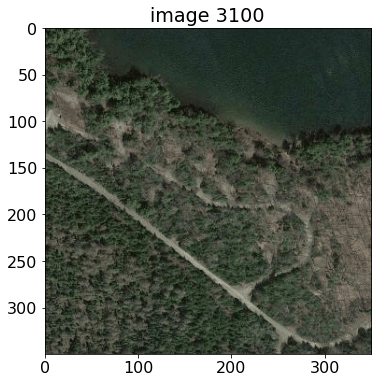

Pulling image 3937, total API requests so far = 3
satimg_WI_3937_Wild Camping_17_43.614192_-91.220194.png
waiting for: 4 seconds
Pulling image 5146, total API requests so far = 4
satimg_WI_5146_Wild Camping_17_44.118374_-89.445207.png
waiting for: 5 seconds
Pulling image 6479, total API requests so far = 5
satimg_WI_6479_Wild Camping_17_44.234537_-90.580404.png
waiting for: 4 seconds
Pulling image 6681, total API requests so far = 6
satimg_WI_6681_Wild Camping_17_44.982131_-92.76032.png
waiting for: 2 seconds
Pulling image 6947, total API requests so far = 7
satimg_WI_6947_Wild Camping_17_46.01155_-89.69078.png
waiting for: 2 seconds
Pulling image 7015, total API requests so far = 8
satimg_WI_7015_Wild Camping_17_46.76277_-91.045989.png
waiting for: 2 seconds
Pulling image 7044, total API requests so far = 9
satimg_WI_7044_Wild Camping_17_44.800787_-89.80895100000002.png
waiting for: 5 seconds
Pulling image 8136, total API requests so far = 10
satimg_WI_8136_Wild Camping_17_45.611372_-

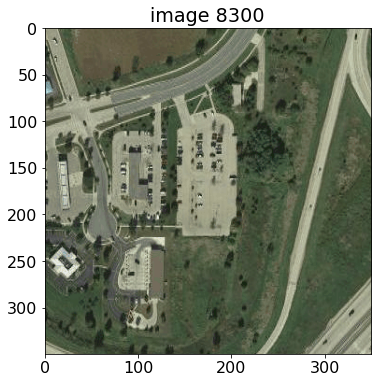

Showers
WI
Pulling image 8463, total API requests so far = 0
satimg_WI_8463_Showers_17_44.356298_-91.934645.png
waiting for: 5 seconds
Water
WI
Pulling image 635, total API requests so far = 0
satimg_WI_635_Water_17_44.323277_-87.815476.png
waiting for: 2 seconds
Pulling image 1980, total API requests so far = 1
satimg_WI_1980_Water_17_46.86012_-91.09841.png
waiting for: 4 seconds
Pulling image 4220, total API requests so far = 2
satimg_WI_4220_Water_17_46.582897_-90.917173.png
waiting for: 3 seconds
Pulling image 7029, total API requests so far = 3
satimg_WI_7029_Water_17_46.883292_-91.047625.png
waiting for: 2 seconds
Short-term Parking
WI
Eco-Friendly
WI


In [30]:
for name, state in zip(names, state_dfs):
    for category in categories:
        print(category)
        tempdf = state[state['Category'] == category]
        #tempdf.info()
        print(name)
        my_funcs.download_images(gmaps, tempdf, max_requests=max_requests, zoomlevel=17, prefix=f'{name}', out_path=f"../data/sat_images/sites_{name}/{category}/", n_requests=n_requests)